# Первый проект
#### Исследование набора данных о видеоиграх, объем продаж которых составил более 100 000 копий.

-	Rank – место по объему продаж
-	Name – название игры
-	Platform – платформа, на которой выпущена игра
-	Year – год релиза
-	Genre – жанр
-	Publisher – издатель
-	NA_Sales – продажи в Северной Америке, в млн.
-	EU_Sales – продажи в Европе, в млн.
-	JP_Sales – продажи в Японии, в млн.
-	Other_Sales – продажи в остальном мире, в млн.
-	Global_Sales – продажи по всему миру, в млн.

1.	Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('1.9 games.csv')
data.head(1)
sns.set(rc={'figure.figsize': (16,6),'figure.dpi': (75)},style='darkgrid')

In [2]:
# сводная таблица
lst = []
for name in data.columns:
    nu = len(data[name].unique())
    nisnan = data[name].isnull().sum()
    #min_val = data[name].min()
    #max_val = data[name].max()
    values_sample = data[name].unique()[:min(nu,10)].tolist()
    lst.append([name,nu,nisnan, values_sample]) #,min_val,max_val
    
pd.DataFrame(lst,columns=['column','nunique','nnull','values']) # ,'min','max'

,column,nunique,nnull,values
0,Rank,16598,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
1,Name,11493,0,"[Wii Sports, Super Mario Bros., Mario Kart Wii..."
2,Platform,31,0,"[Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, ..."
3,Year,40,271,"[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989...."
4,Genre,12,0,"[Sports, Platform, Racing, Role-Playing, Puzzl..."
5,Publisher,579,58,"[Nintendo, Microsoft Game Studios, Take-Two In..."
6,NA_Sales,409,0,"[41.49, 29.08, 15.85, 15.75, 11.27, 23.2, 11.3..."
7,EU_Sales,305,0,"[29.02, 3.58, 12.88, 11.01, 8.89, 2.26, 9.23, ..."
8,JP_Sales,244,0,"[3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.5, 2.9..."
9,Other_Sales,157,0,"[8.46, 0.77, 3.31, 2.96, 1.0, 0.58, 2.9, 2.85,..."


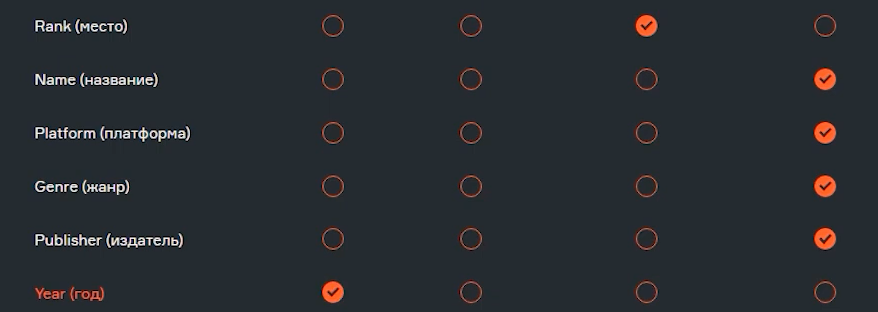
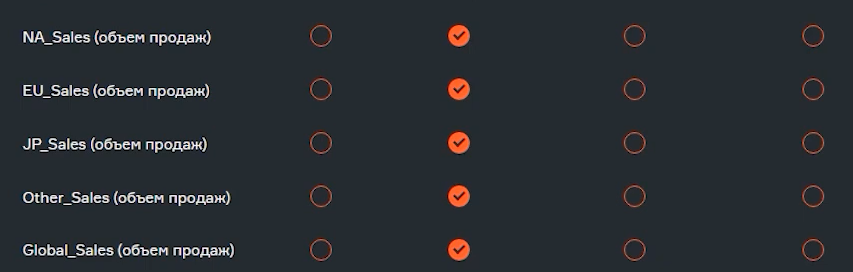

In [3]:
data.dropna(inplace=True)

2.	Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.

<Axes: xlabel='Year', ylabel='Count'>

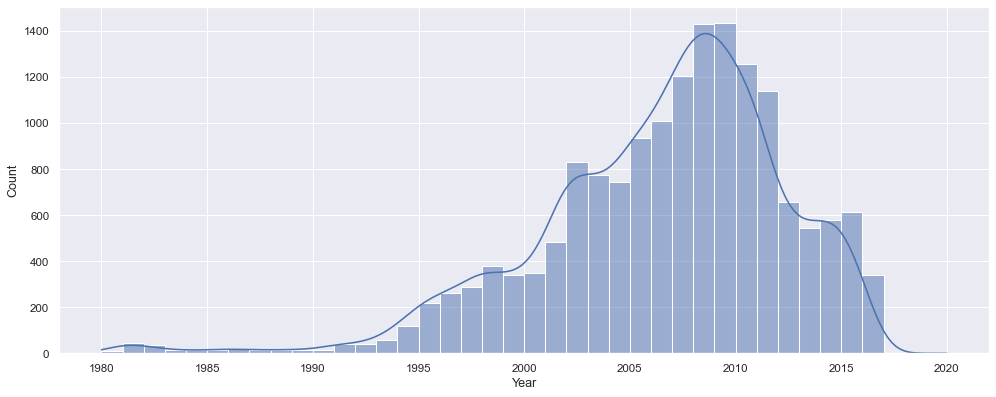

In [4]:
sns.histplot(data=data['Year'],bins=40,kde=True)

In [5]:
data.query("Year <= 2007").shape[0]/16291, data.query("Year > 2007").shape[0]/16291

(0.5093609968694371, 0.4906390031305629)

In [6]:
data.Year.median()

2007.0

3.	На каких платформах произошло больше всего релизов?

In [7]:
platforms = data['Platform'].value_counts(normalize=True).sort_values(ascending=False).mul(100).to_frame('pct').reset_index()
platforms.query('pct > 7')['Platform'].values.tolist()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

4.	Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [8]:
data['Publisher'].value_counts().sort_values(ascending=False).head(1).values.tolist()

[1339]

In [9]:
data['Publisher'].describe()

count               16291
unique                576
top       Electronic Arts
freq                 1339
Name: Publisher, dtype: object

5.	В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)

In [10]:
data[data['Publisher'] == 'Nintendo'][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].agg(['median','mean','std'])
 #median().sort_values(ascending=False).nlargest(1).index

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
median,0.375000,0.120000,0.280000,0.030000
mean,1.172055,0.601006,0.653721,0.136767
std,2.989913,1.743953,1.063110,0.464170


In [11]:
data[data['Publisher'] == 'Nintendo'][['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].describe().T[['50%','mean','std']]

,50%,mean,std
NA_Sales,0.375,1.172055,2.989913
EU_Sales,0.120,0.601006,1.743953
JP_Sales,0.280,0.653721,1.063110
Other_Sales,0.030,0.136767,0.464170


6.	Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

In [12]:
data.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


<Axes: xlabel='JP_Sales', ylabel='Genre'>

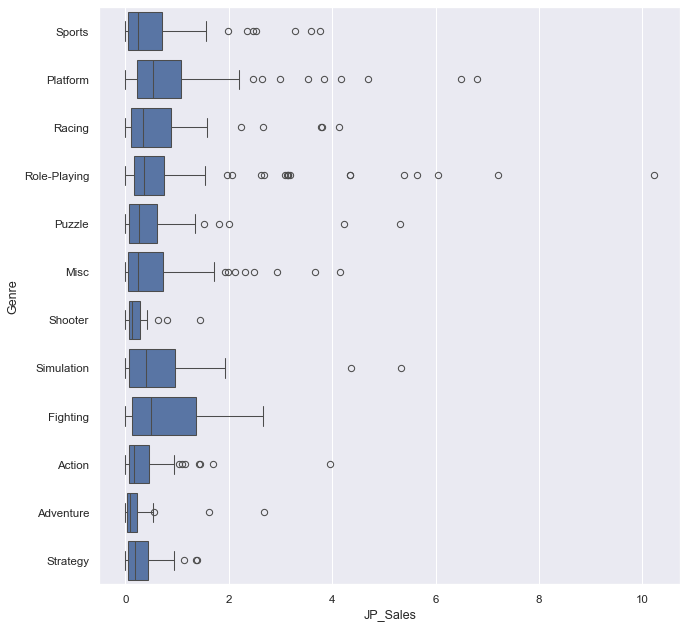

In [13]:
plt.figure(figsize=(10,10),dpi=75)
sns.boxplot(data=data[(data['Publisher'] == 'Nintendo')], y='Genre', x = 'JP_Sales')

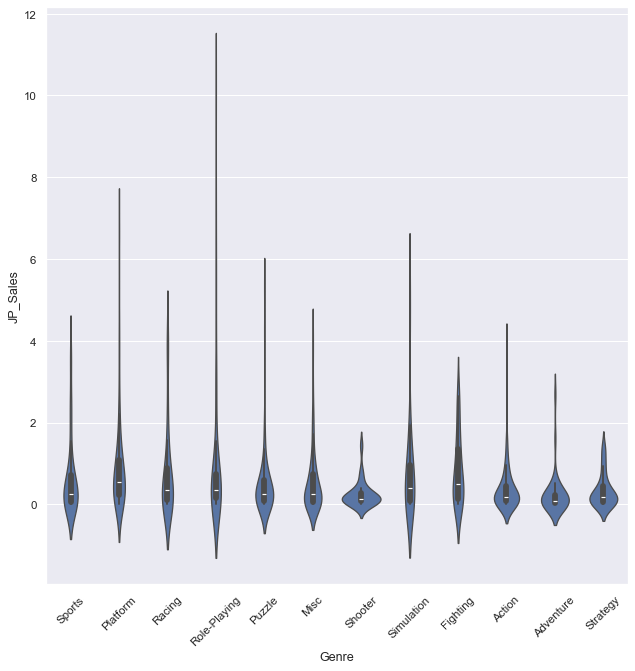

In [14]:
plt.figure(figsize=(10,10),dpi=75)
sns.violinplot(data=data[(data['Publisher'] == 'Nintendo')], x='Genre', y = 'JP_Sales')
plt.xticks(rotation=45);

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3370: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3370: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3370: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Adminis

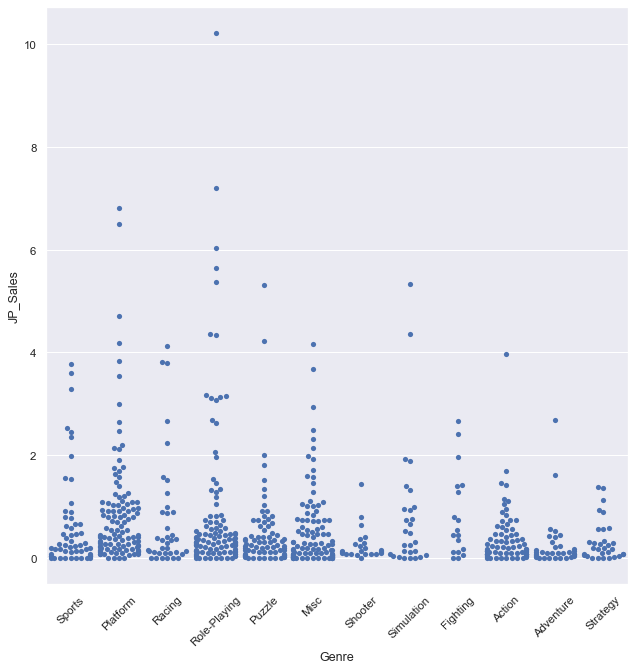

In [15]:
plt.figure(figsize=(10,10),dpi=75)
sns.swarmplot(data=data[(data['Publisher'] == 'Nintendo')], x='Genre', y = 'JP_Sales')
plt.xticks(rotation=45);

7.	Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

In [16]:
data_games =  (data[(data['Publisher'] == 'Nintendo') 
            & (data['Genre'].isin(['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']))]
               .groupby(['Genre','Year'])['Global_Sales']
               .sum()
               .reset_index())


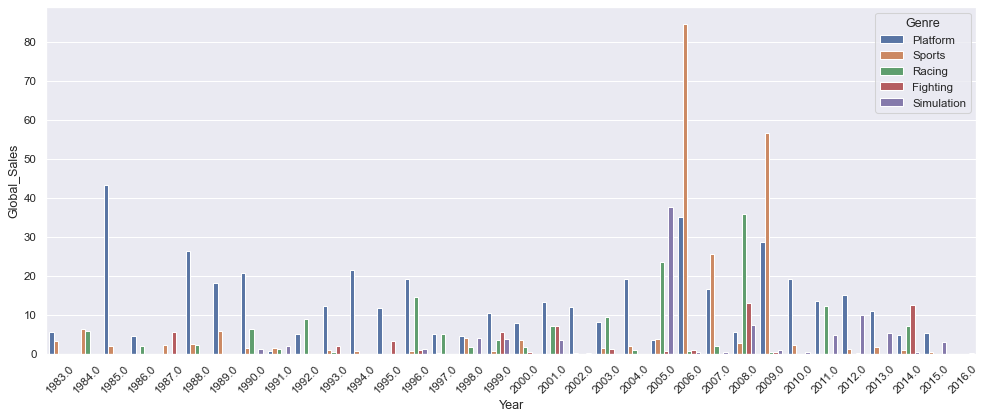

In [20]:
sns.barplot(data=data_games,x='Year',y='Global_Sales', hue = 'Genre')
plt.xticks(rotation=45);

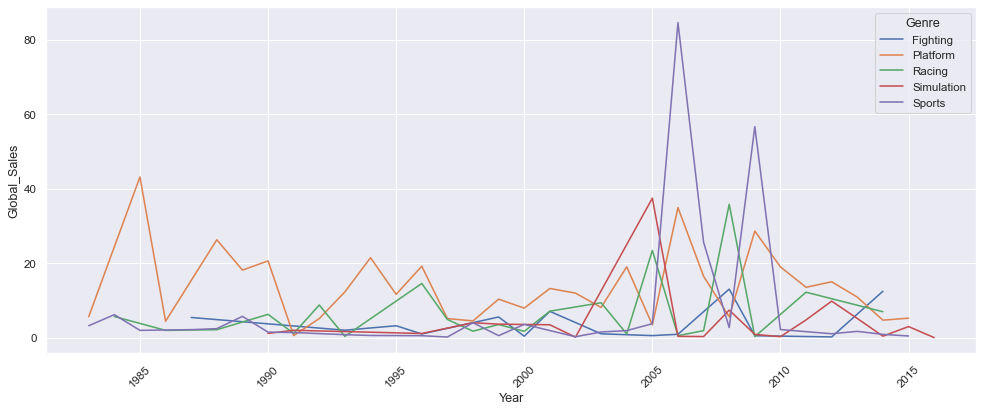

In [21]:
sns.lineplot(data=data_games,x='Year',y='Global_Sales', hue = 'Genre')
plt.xticks(rotation=45);